# Get data

# Read data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from video_processing import read_video_array

df = pd.read_csv('data/experimental_data.tsv', sep='\t')
df.columns = ['t', 'x', 'y', 'vx', 'vy', 'ax', 'ay', 'unk', 'frame', 'k', 'angle']
df = df[df['frame'] > 142]
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 3 to 128
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       126 non-null    object 
 1   x       126 non-null    object 
 2   y       126 non-null    object 
 3   vx      125 non-null    object 
 4   vy      125 non-null    object 
 5   ax      125 non-null    object 
 6   ay      125 non-null    object 
 7   unk     125 non-null    object 
 8   frame   126 non-null    float64
 9   k       126 non-null    object 
 10  angle   126 non-null    object 
dtypes: float64(1), object(10)
memory usage: 11.8+ KB
None


,t,x,y,vx,vy,ax,ay,unk,frame,k,angle
3,"0,123","-67,28","16,25","70,86","-13,16","677,6",-124,"-2,6",143.0,"2,60E+03","-8,8"
4,"0,166","-63,83","14,81","97,48","-22,85",550,"-186,6","-0,6",144.0,"5,01E+03","-8,3"
5,"0,208","-59,04","14,32","123,4","-21,95","569,8","87,37","-6,7",145.0,"7,86E+03","-7,7"
6,"0,248","-53,72","13,01","147,1","-22,39","477,8","-20,28","-15,2",146.0,"1,11E+04",-7
7,"0,289","-47,13","12,51",158,"-17,56","416,4","63,19","-27,7",147.0,"1,26E+04","-6,2"
...,...,...,...,...,...,...,...,...,...,...,...
124,"5,165","60,88","5,537","-12,01","-12,07","-606,5","334,9","-10,3",264.0,"1,45E+02","7,4"
125,"5,214","59,91","5,113","-37,78","11,57","-541,6","187,8","14,9",265.0,"7,81E+02","7,3"
126,"5,262","57,23","6,656","-65,07","13,66","-454,5","-115,1","20,1",266.0,"2,21E+03",7
127,"5,302","54,18","6,317","-85,28","-7,65","-324,5","-387,2","2,6",267.0,"3,67E+03","6,6"


In [30]:
def convert_numeric(df: pd.DataFrame) -> pd.DataFrame:
  for col in df.columns:
    df[col] = df[col].str.replace(',', '.').astype('float')
  return df

df = convert_numeric(df.astype(str))

In [31]:
df.set_index('frame', inplace=True)
df

,t,x,y,vx,vy,ax,ay,unk,k,angle
frame,,,,,,,,,,
143.0,0.123,-67.28,16.250,70.86,-13.16,677.6,-124.00,-2.6,2600.0,-8.8
144.0,0.166,-63.83,14.810,97.48,-22.85,550.0,-186.60,-0.6,5010.0,-8.3
145.0,0.208,-59.04,14.320,123.40,-21.95,569.8,87.37,-6.7,7860.0,-7.7
146.0,0.248,-53.72,13.010,147.10,-22.39,477.8,-20.28,-15.2,11100.0,-7.0
147.0,0.289,-47.13,12.510,158.00,-17.56,416.4,63.19,-27.7,12600.0,-6.2
...,...,...,...,...,...,...,...,...,...,...
264.0,5.165,60.88,5.537,-12.01,-12.07,-606.5,334.90,-10.3,145.0,7.4
265.0,5.214,59.91,5.113,-37.78,11.57,-541.6,187.80,14.9,781.0,7.3
266.0,5.262,57.23,6.656,-65.07,13.66,-454.5,-115.10,20.1,2210.0,7.0


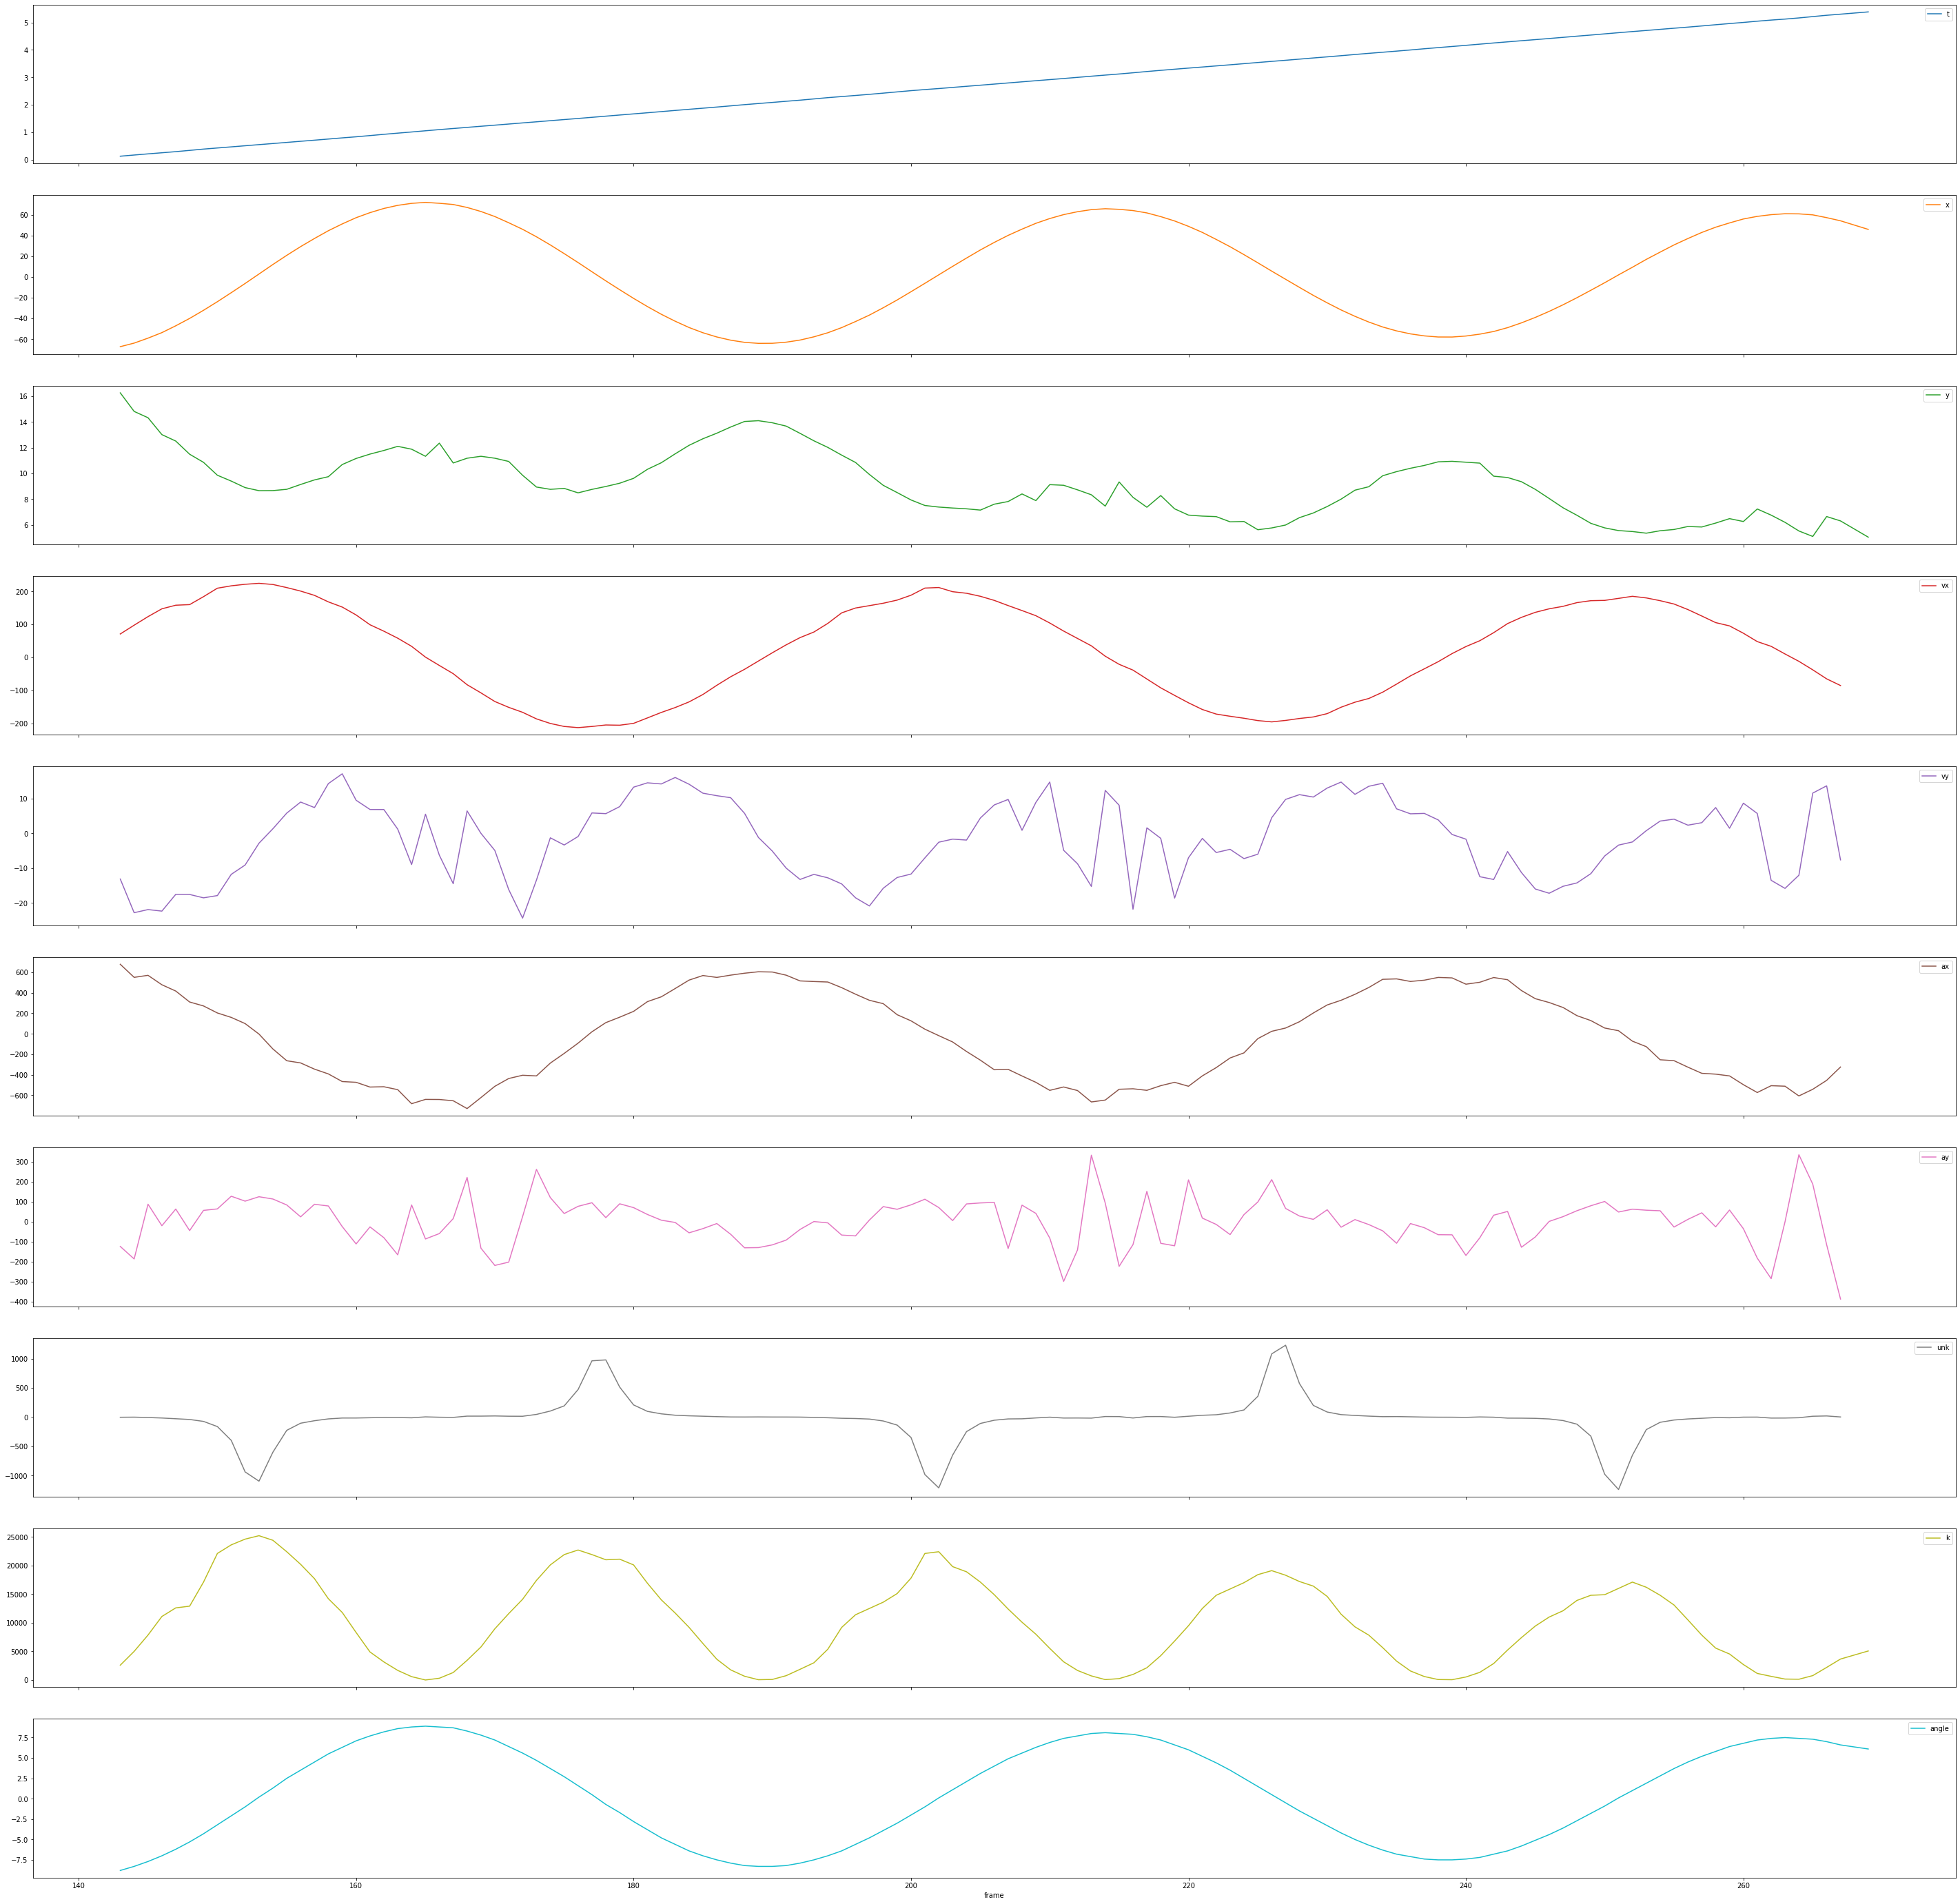

In [32]:
df.plot(subplots=True, figsize=(len(df.columns)*5, len(df.columns)*5), sharex=True)
plt.show()

# Plots

In [27]:
start_frame=140
end_frame=start_frame+120
video, fps = read_video_array('data/fisica_video.mp4')

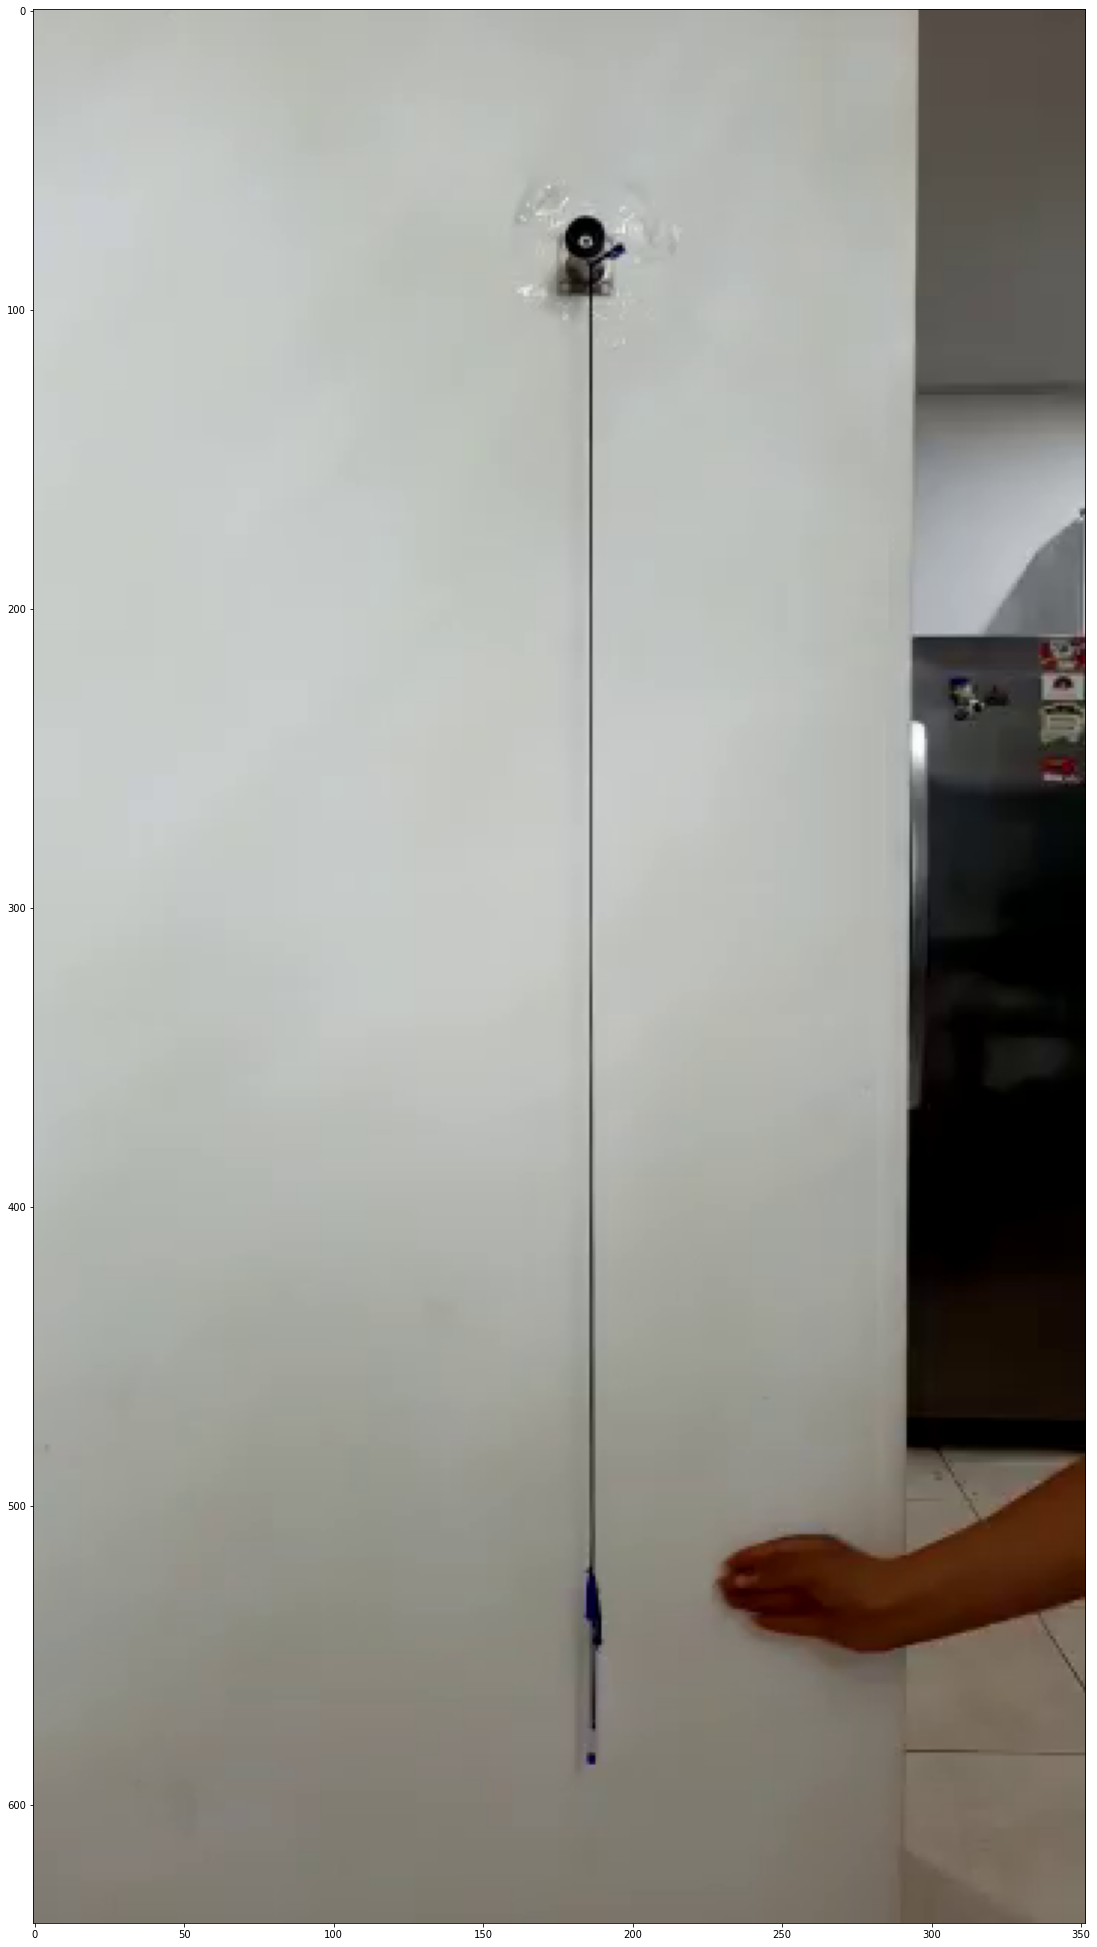

In [28]:
figsize = tuple(map(lambda x: x / 10, video.shape[1:3]))
plt.figure(figsize=figsize)
plt.imshow(video[0,:,:,:])

# Fuerza

$F = m \text{ } a_T = -m \text{ } g$

$F = m \text{ } a_T = - m \text{ } g \text{ } sin(\theta) $

$ a_T = - \text{ } g \text{ } sin(\theta) $

# Equations

$f(t) = A cos (\omega t + \phi) $

, donde:

$\omega = \sqrt{\frac{g}{L}} $

$ g = 9.77 \frac{m}{s^2} $,

 $L = 1 m$

$A = ?$


para ángulos pequeños $\theta < 20° $, se cumple que $ sin(\theta) \approx \theta $




## Aceleración tangencial


$a_T  = -g \text{ } \theta $

$\frac{d^{2}\theta \text{ } }{dt^{2}} L = a_T$

$\frac{d^{2}\theta }{dt^{2}} = \frac{a_T}{L}$

# Posición

$\theta(t) = \theta_0 \text{ } cos (\omega t + \phi)   $ 

, donde 

$\theta_0 = 8.8 ^{\circ}$


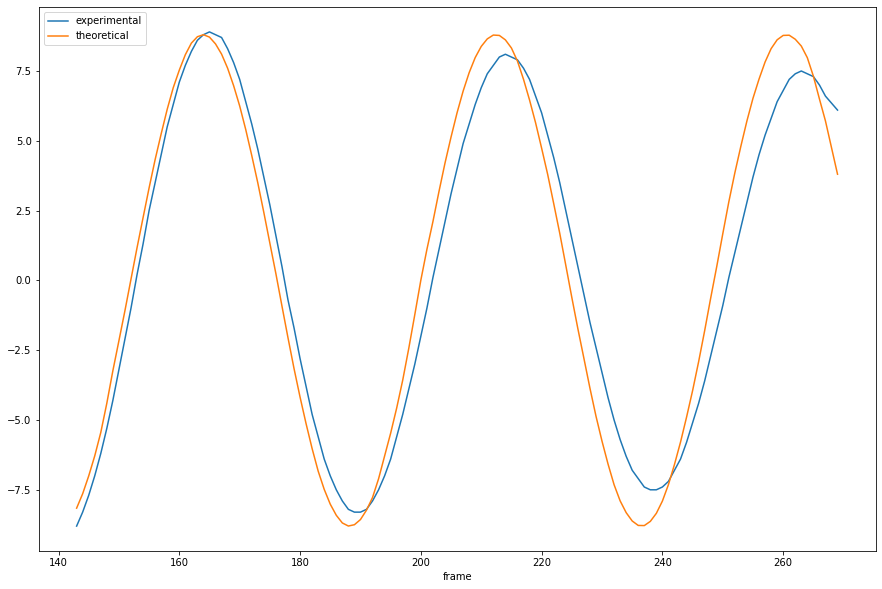

In [40]:
g = 9.77
L = 1
omega = np.sqrt(g / L)
theta_0 = np.deg2rad(-8.8)
phi = 0
theta = lambda t : theta_0 * np.cos(omega*t + phi)
df['theta_theoretical'] = np.rad2deg(theta(df['t']))

df['angle'].plot(label='experimental', figsize=(15,10))
df['theta_theoretical'].plot(label='theoretical')
plt.legend()
plt.show()

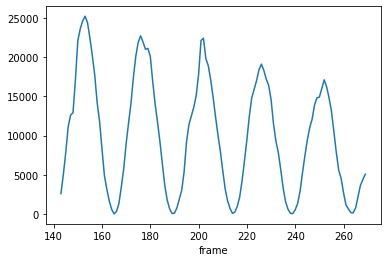

In [ ]:
df['k'].plot()

In [ ]:
from dataclasses import dataclass

@dataclass
class SimpleHarmonicSystem:
    theta_0: float
    omega: float
    phi: float
    m: float
    L: float
    g: float

    def theta(self,  t: float) -> float:
        return self.theta_0 * np.cos(self.omega*t + self.phi) 

    def velocity(self, t: float) -> float:
        return -self.theta_0 * self.omega * np.sin(self.omega*t + self.phi)

    def acceleration(self, t: float) -> float:
        return -self.omega**2 * self.theta(t)

    def ek(self, t: float) -> float:
        return (1/1) * self.m * (self.theta_0 * self.omega * np.sin(self.omega*t + self.phi))

    def eu(self, t: float) -> float:
        return self.m * self.g * self.L * (1 - np.cos(self.theta(t)))

# Velocidad


$v(t) = -\theta_0 \text{ } \omega \text{ } sin (\omega t + \phi) $


# Aceleración

$a(t) = -\theta_0 \text{ } 𝞈^{2} \text{ } cos (\omega t + \phi) $ 

reorganizando tenemos 

$ a(t) = -\omega^{2} \text{ }  \theta_0 \text{ }  cos (\omega t + \phi) $

que es igual a 

$ a(t) = -\omega^{2} \text{ }  \theta(t) $

# Energías

$E_k = \frac{1}{2} m (\theta_0 \text{ } \omega \text{ } sin(\omega t + \phi))$

cuando 

$ϴ = 0, E_K$ es máxima


La energía potencial se define como $ E_u = m \text{ } g \text{ } h$, se tiene que

donde $h = L - L cos(\theta)$

$E_u(t) = m \text{ } g \text{ } h =  m \text{ } g \text{ } L \text{ } (1 - cos(\theta(t)))$

cuando $\theta$ = $\theta_0$, $E_u$ es máxima

$E_m = E_u + E_k$


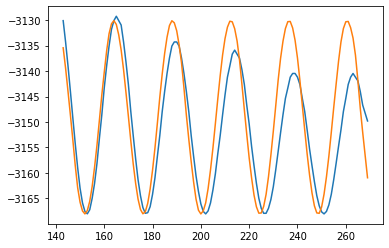

In [42]:
m = 5.76
g = 9.77
L = 1
eu_exp = m * g * L * (1 - np.rad2deg(np.cos(np.deg2rad(df['angle']))))
eu_theoretical = m * g * L * (1 - np.rad2deg(np.cos(np.deg2rad(df['theta_theoretical']))))
plt.plot(eu_exp)
plt.plot(eu_theoretical)